In [12]:
import pandas as pd
import numpy as np

In [13]:
nord_rev = pd.read_csv('/content/nord.csv',engine='python',index_col=False)
nord_rev.head(15)


,Unnamed: 0,product,title,rating,body
0,0,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Camera quality all overall good but only nagat...
1,1,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good product,4,Over all good product. But I want to upgrade t...
2,2,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Oneplus,4,So far I'm enjoying it. I hope this will be a ...
3,3,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Ok,4,Phone is good but camera is not that good acco...
4,4,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Not upto mark,4,Battery drain very fast ..camera quality is no...
5,5,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Battery charging is superfastNo lagging but fi...
6,6,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Super phone ho sakta tha,4,jitani jaldi battary charg hoti h utna jaldi k...
7,7,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",बैटरी ड्रेन बहुत जल्द हो रही है ।,4,हमने इसे अच्छी बैटरी बैकप के लिए खरीदा था जो ...
8,8,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery capacity was too bad when it is in loc...,4,Very fast
9,9,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery is not service,4,Battery is not service camera is good


In [14]:
nord_rev['review']=nord_rev['title']+" "+nord_rev['body']

In [15]:
nord_rev.head()

,Unnamed: 0,product,title,rating,body,review
0,0,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Camera quality all overall good but only nagat...,Good phone Camera quality all overall good but...
1,1,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good product,4,Over all good product. But I want to upgrade t...,Good product Over all good product. But I want...
2,2,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Oneplus,4,So far I'm enjoying it. I hope this will be a ...,Oneplus So far I'm enjoying it. I hope this wi...
3,3,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Ok,4,Phone is good but camera is not that good acco...,Ok Phone is good but camera is not that good a...
4,4,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Not upto mark,4,Battery drain very fast ..camera quality is no...,Not upto mark Battery drain very fast ..camera...


In [16]:
nord_rev.isnull().sum()

Unnamed: 0      0
product         0
title           0
rating          0
body          115
review        115
dtype: int64

<Figure size 1800x1440 with 0 Axes>

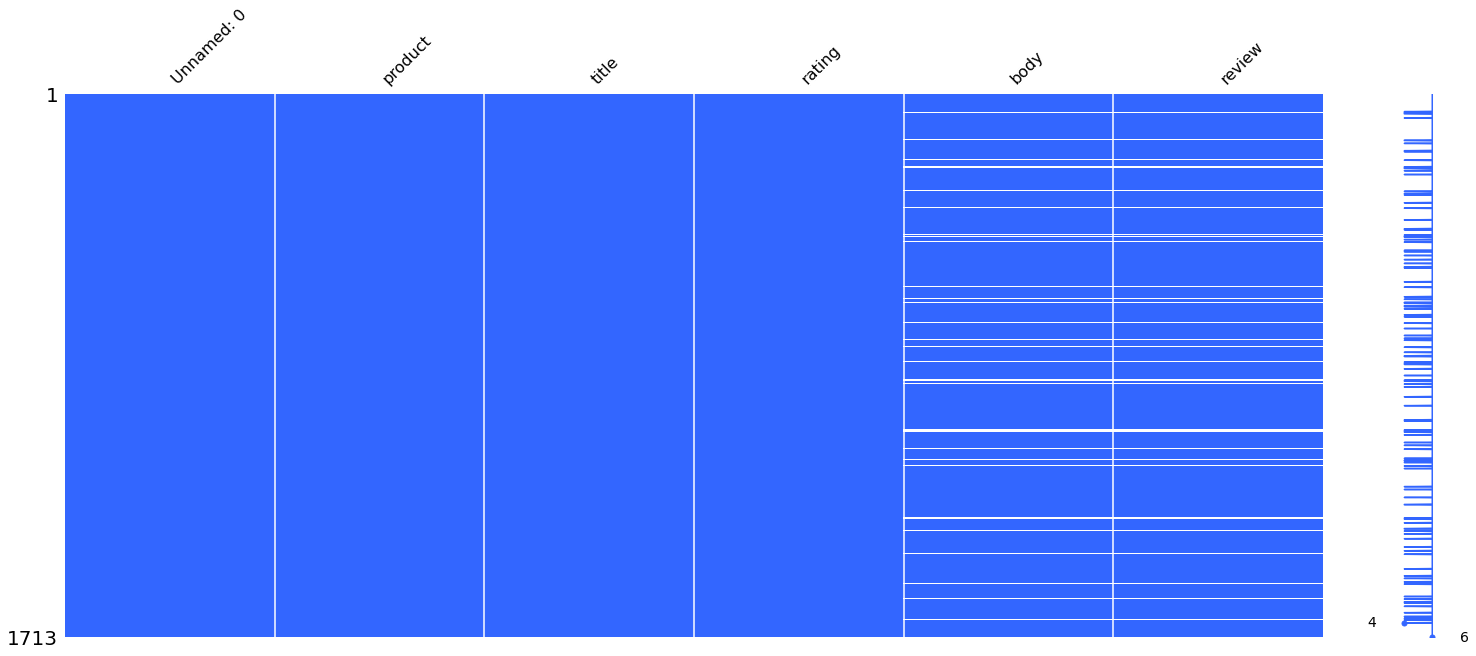

In [17]:
import matplotlib.pyplot as plt
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(nord_rev, color=[0.2, 0.4, 1])
plt.show()

In [18]:
nord_rev.dropna(inplace=True, axis=0)
nord_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 0 to 1712
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1598 non-null   int64 
 1   product     1598 non-null   object
 2   title       1598 non-null   object
 3   rating      1598 non-null   int64 
 4   body        1598 non-null   object
 5   review      1598 non-null   object
dtypes: int64(2), object(4)
memory usage: 87.4+ KB


<Figure size 1800x1440 with 0 Axes>

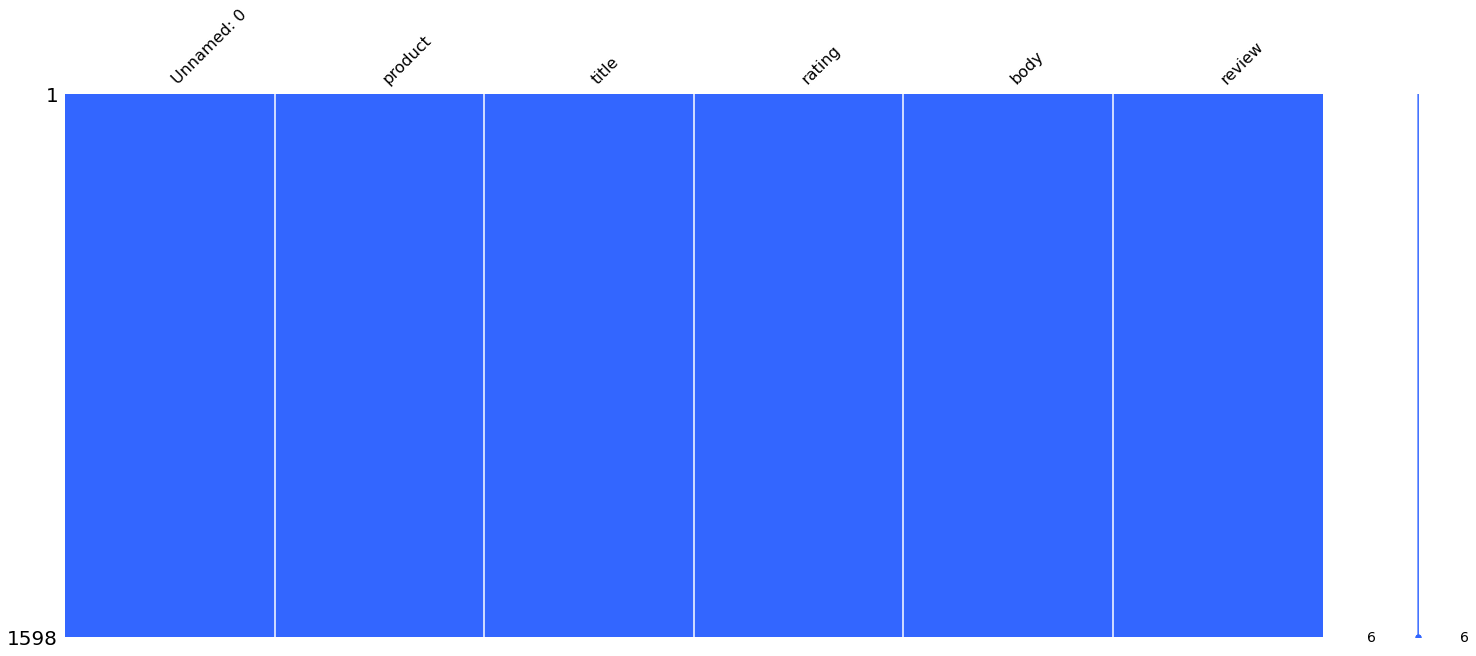

In [19]:
import matplotlib.pyplot as plt
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(nord_rev, color=[0.2, 0.4, 1])
plt.show()

In [20]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 2.8 MB/s eta 0:00:00


In [21]:
import demoji

def handle_emoji(string):
    emojis = demoji.findall(string)
    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])
    return string    

In [22]:
nord_rev['review'] = nord_rev['review'].apply(handle_emoji)

In [23]:
nord_rev.head(15)

,Unnamed: 0,product,title,rating,body,review
0,0,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Camera quality all overall good but only nagat...,Good phone Camera quality all overall good but...
1,1,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good product,4,Over all good product. But I want to upgrade t...,Good product Over all good product. But I want...
2,2,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Oneplus,4,So far I'm enjoying it. I hope this will be a ...,Oneplus So far I'm enjoying it. I hope this wi...
3,3,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Ok,4,Phone is good but camera is not that good acco...,Ok Phone is good but camera is not that good a...
4,4,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Not upto mark,4,Battery drain very fast ..camera quality is no...,Not upto mark Battery drain very fast ..camera...
5,5,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Battery charging is superfastNo lagging but fi...,Good phone Battery charging is superfastNo lag...
6,6,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Super phone ho sakta tha,4,jitani jaldi battary charg hoti h utna jaldi k...,Super phone ho sakta tha jitani jaldi battary ...
7,7,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",बैटरी ड्रेन बहुत जल्द हो रही है ।,4,हमने इसे अच्छी बैटरी बैकप के लिए खरीदा था जो ...,बैटरी ड्रेन बहुत जल्द हो रही है । हमने इसे अच...
8,8,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery capacity was too bad when it is in loc...,4,Very fast,Battery capacity was too bad when it is in loc...
9,9,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Battery is not service,4,Battery is not service camera is good,Battery is not service Battery is not service ...
